
# Section 1: Import libraries and loading datasets

In [56]:
# Data processing and manipulation
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
# to avoid having to do plt.show()
%matplotlib inline

In [3]:
df_a=pd.read_csv('aisles.csv')
df_d=pd.read_csv('departments.csv')
df_train=pd.read_csv('order_products__train.csv')
df_prior=pd.read_csv('order_products__prior.csv')
df_products=pd.read_csv('products.csv')
df_order=pd.read_csv('orders.csv')
df_a.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
len(df_a)

134

In [5]:
df_d.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
len(df_d)

21

In [8]:
df_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
len(df_prior)

32434489

In [9]:
len(df_train)

1384617

In [10]:
df_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [11]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
df_order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
len(df_order)

3421083

In [14]:
# one order can relate to many product; in train set
# one user can relate to many order in order set
# so when merge on the order id(left join); but be careful on ther eval_set

In [15]:
df_order.groupby('eval_set').size()

eval_set
prior    3214874
test       75000
train     131209
dtype: int64

In [16]:
df_order[df_order['eval_set']=='test'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


# Section 2: Investgate the user behavior in the orders dataset

Since we investigate a specific user, the order should be sum up for one user

In [17]:
df2=df_order.groupby('user_id')["order_number"].aggregate(np.max).reset_index()#.rename({'order_number':'total_number'})
df2.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


We can see that the order number (contains the prior orders) could serve as continuous (linear) variable when merge to the train set

In [18]:
df_order=df_order.merge(df2,on='user_id',how='left')
df_order.head()


,order_id,user_id,eval_set,order_number_x,order_dow,order_hour_of_day,days_since_prior_order,order_number_y
0,2539329,1,prior,1,2,8,NaN,11
1,2398795,1,prior,2,3,7,15.0,11
2,473747,1,prior,3,3,12,21.0,11
3,2254736,1,prior,4,4,7,29.0,11
4,431534,1,prior,5,4,15,28.0,11


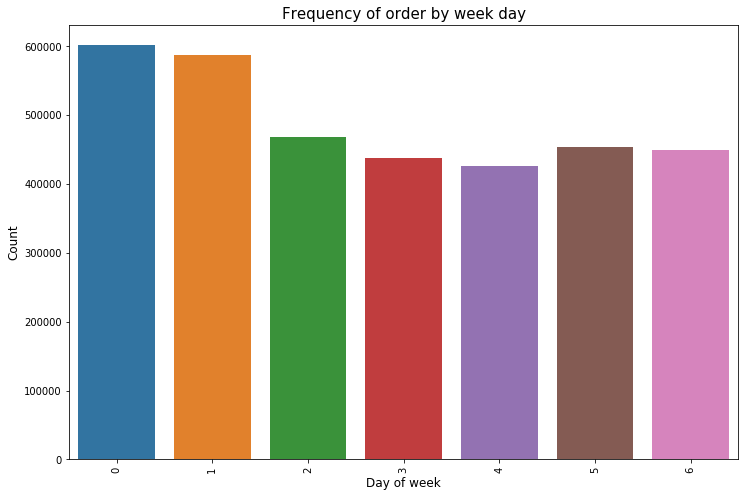

In [22]:
# Understand the days of the week
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=df_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

From analysis of "day of the week" column, we could see that the order is more in day 0 and day 1 (Although there is no indication that what 0 and 1 means here), we can assume that 0, 1 is for weekend. So the day of the week column could be catagory as weekday (0) and weekend (1).

In [23]:
df_order['dow_after']=np.where((df_order['order_dow']==0) | (df_order['order_dow']==1),1,0)

In [24]:
df_order.head()

,order_id,user_id,eval_set,order_number_x,order_dow,order_hour_of_day,days_since_prior_order,order_number_y,dow_after
0,2539329,1,prior,1,2,8,NaN,11,0
1,2398795,1,prior,2,3,7,15.0,11,0
2,473747,1,prior,3,3,12,21.0,11,0
3,2254736,1,prior,4,4,7,29.0,11,0
4,431534,1,prior,5,4,15,28.0,11,0


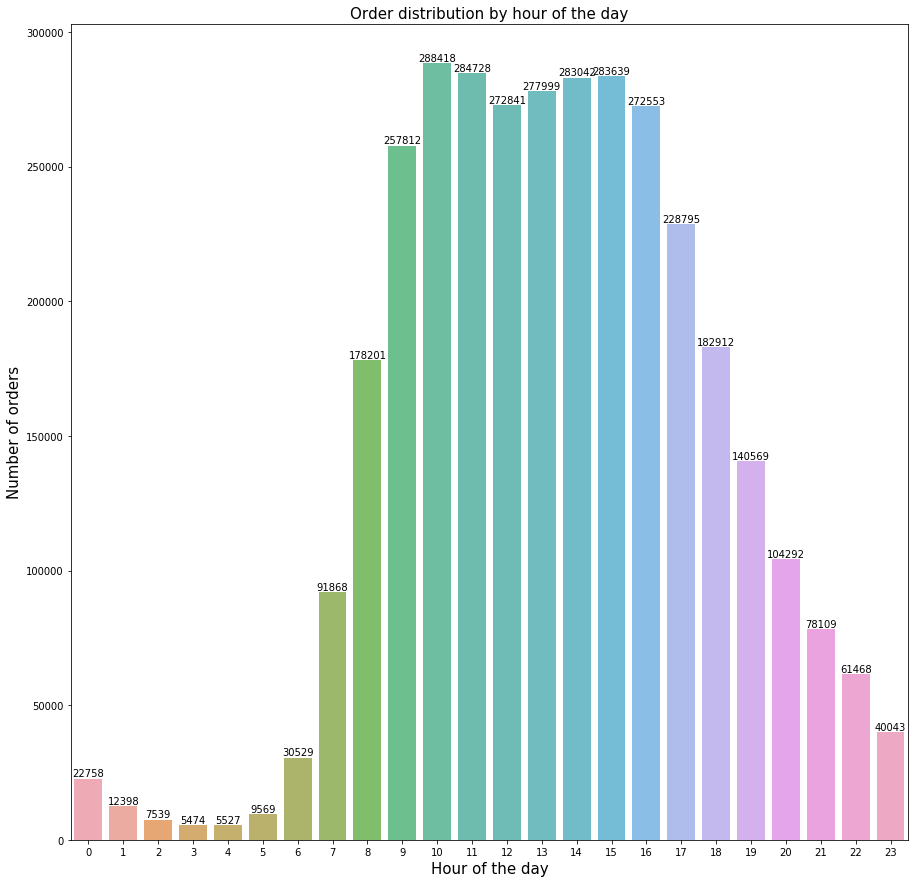

In [45]:
hod = df_order['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(15,15))
ax = sns.barplot(hod.index, hod.values, alpha=0.8)
plt.title('Order distribution by hour of the day', fontsize = 15)
plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Hour of the day', fontsize=15)

rects = ax.patches
labels = hod.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()

The order is more in daytime (8-18), so this column could be category as daytime (1) and nighttime (0)

In [27]:
df_order['order_hour_after']=np.where((df_order['order_hour_of_day']>8) & (df_order['order_hour_of_day']<18),1,0)

In [28]:
df_order.head()

,order_id,user_id,eval_set,order_number_x,order_dow,order_hour_of_day,days_since_prior_order,order_number_y,dow_after,order_hour_after
0,2539329,1,prior,1,2,8,NaN,11,0,0
1,2398795,1,prior,2,3,7,15.0,11,0,0
2,473747,1,prior,3,3,12,21.0,11,0,1
3,2254736,1,prior,4,4,7,29.0,11,0,0
4,431534,1,prior,5,4,15,28.0,11,0,1


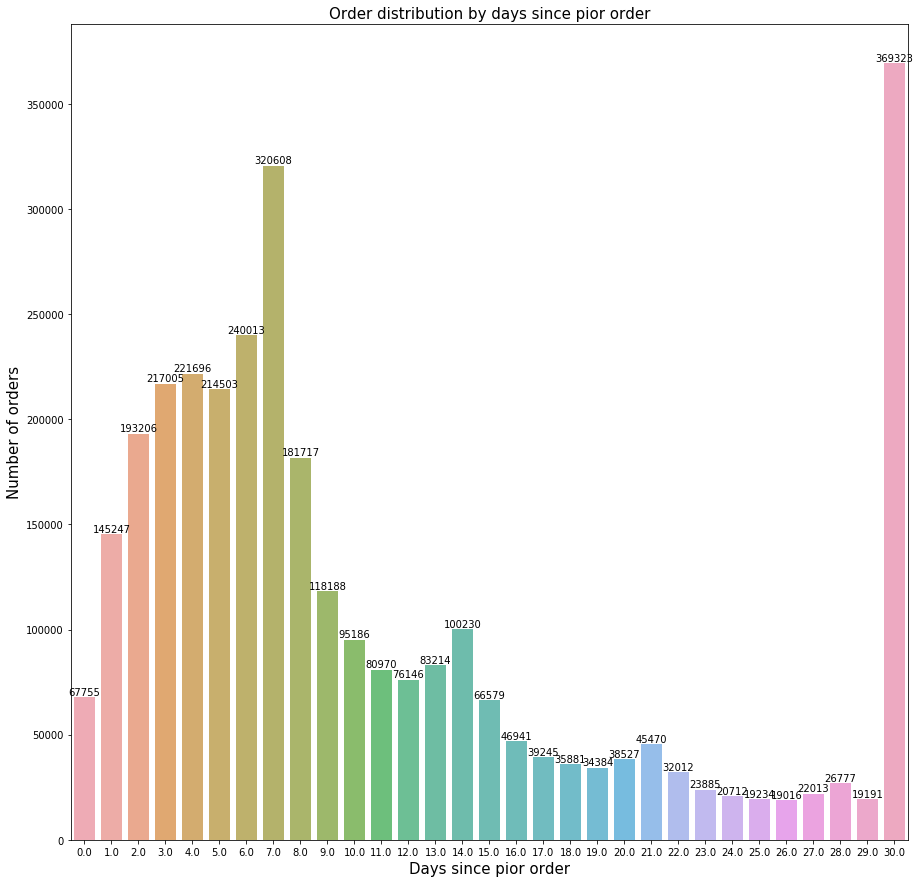

In [42]:
dspo = df_order['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(15,15))
ax = sns.barplot(dspo.index, dspo.values, alpha=0.8)
plt.title("Order distribution by days since pior order", fontsize = 15)
plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Days since pior order', fontsize=15)

rects = ax.patches
labels = dspo.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()

There are two peaks in the order, every 7 days and every 30 days (may be subscibe by week or by month), so we could add categorical variable indicate whether the order is order at 7 days or 30 days.

In [31]:
df_order['subsribe']=np.where((df_order['days_since_prior_order']==7) |(df_order['days_since_prior_order']==7),1,0)

In [32]:
df_order.head()

,order_id,user_id,eval_set,order_number_x,order_dow,order_hour_of_day,days_since_prior_order,order_number_y,dow_after,order_hour_after,subsribe
0,2539329,1,prior,1,2,8,NaN,11,0,0,0
1,2398795,1,prior,2,3,7,15.0,11,0,0,0
2,473747,1,prior,3,3,12,21.0,11,0,1,0
3,2254736,1,prior,4,4,7,29.0,11,0,0,0
4,431534,1,prior,5,4,15,28.0,11,0,1,0


In [33]:
df_order2=df_order[['order_id', 'user_id', 'eval_set','order_number_x','order_number_y','dow_after','order_hour_after','subsribe']]

In [34]:
df_order2.head()

,order_id,user_id,eval_set,order_number_x,order_number_y,dow_after,order_hour_after,subsribe
0,2539329,1,prior,1,11,0,0,0
1,2398795,1,prior,2,11,0,0,0
2,473747,1,prior,3,11,0,1,0
3,2254736,1,prior,4,11,0,0,0
4,431534,1,prior,5,11,0,1,0


# Section 3: Investigate the product information in product dataset

First, we merge the product dataset to the train dataset, to see what kind of product is most frequently ordered and reordered.

In [35]:
df_model_train=df_order2[df_order2['eval_set']=='prior']

In [36]:
df_train_product0=df_prior.merge(df_products,on='product_id',how='left')

Add on the names of aisle_id and department_id

In [37]:
df_train_product1=pd.merge(df_train_product0,df_a,on='aisle_id',how='left')
df_train_product=pd.merge(df_train_product1, df_d,on='department_id',how='left')

In [38]:
df_train_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

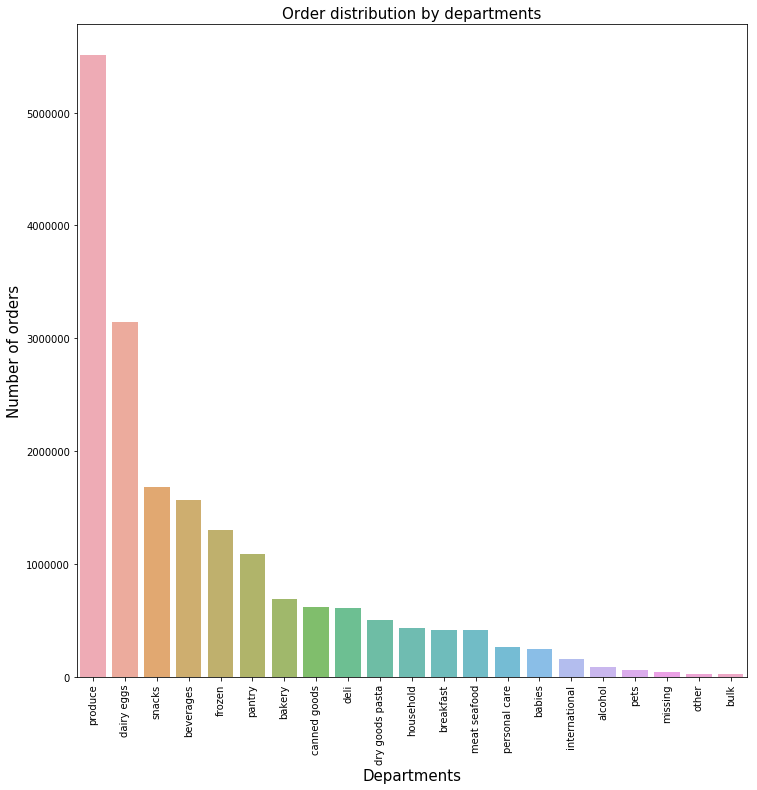

In [47]:
department_cnt = df_train_product['department'].value_counts()

plt.figure(figsize=(12,12))
ax = sns.barplot(department_cnt.index, department_cnt.values, alpha=0.8)
plt.title("Order distribution by departments", fontsize = 15)
plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Departments', fontsize=15)
plt.xticks(rotation='vertical')

In [48]:
df3=pd.get_dummies(df_train_product['department'])
len(df3)

18855400

In [49]:
len(df_train_product)

18855400

In [50]:
df_train_product=pd.concat([df_train_product[['order_id','product_id','add_to_cart_order','reordered','aisle_id']],df3],axis=1)

In [51]:
df_train_product.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,alcohol,babies,bakery,beverages,breakfast,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,2,33120,1.0,1.0,86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,28985,2.0,1.0,83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,9327,3.0,0.0,104,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,45918,4.0,1.0,19,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,30035,5.0,0.0,17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
df_train_product.groupby('aisle_id').size() # total have 134 aisles,could not all change to dummy；use for continuous or categorical?

aisle_id
1        42112
2        48108
3       265616
4       116180
5        36621
6        21014
7        19487
8        20276
9       126976
10        5404
11       15117
12       21305
13       57450
14       74992
15       12139
16      219551
17      189652
18       10057
19      142618
20       37305
21      569425
22       18661
23       95057
24     2118064
25       37073
26      120209
27       28229
28       20323
29       38730
30       43732
        ...   
105      61373
106     177598
107     420632
108     179492
109       5892
110      65083
111      25199
112     340356
113       2761
114      68921
115     489495
116     304361
117     177971
118       6261
119      11291
120     844191
121     219905
122      41016
123    1025715
124      16154
125      20842
126      11676
127      23744
128     112314
129     112823
130      91917
131     155385
132       3573
133      10972
134       6511
Length: 134, dtype: int64

In [53]:
# moreover, the aisle_id should have a strong correlation with department id, together influence the reorder(first how to test,
#second: choose one?)

In [54]:
#too many category for add to cart

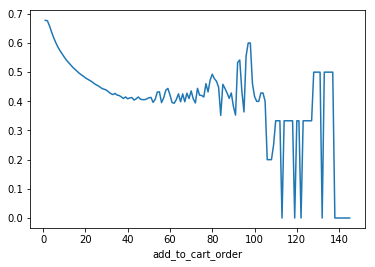

In [55]:
df_train_product.groupby('add_to_cart_order')["reordered"].aggregate("mean").plot()